# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf

%matplotlib inline

ModuleNotFoundError: No module named 'object_detection'

In [2]:
dataset = get_dataset("/home/workspace/data/**/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/**/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/**/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 99
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


In [5]:
print(tf.data.experimental.cardinality(dataset))

tf.Tensor(-2, shape=(), dtype=int64)


In [6]:
dataset_example = dataset.take(10).enumerate()
for element in dataset_example.as_numpy_iterator():
  print(element)

(0, {'image': array([[[166, 183, 226],
        [168, 185, 228],
        [166, 183, 226],
        ...,
        [166, 183, 226],
        [168, 186, 226],
        [169, 187, 227]],

       [[163, 180, 223],
        [166, 183, 226],
        [167, 184, 227],
        ...,
        [166, 183, 226],
        [167, 185, 225],
        [167, 185, 225]],

       [[166, 183, 226],
        [166, 183, 226],
        [163, 180, 223],
        ...,
        [167, 185, 225],
        [168, 186, 226],
        [167, 185, 225]],

       ...,

       [[ 82,  95, 104],
        [ 82,  95, 104],
        [ 88, 101, 110],
        ...,
        [ 83,  86,  91],
        [ 81,  84,  89],
        [ 87,  90,  95]],

       [[ 81,  94, 103],
        [ 80,  93, 102],
        [ 84,  97, 106],
        ...,
        [ 82,  85,  90],
        [ 81,  84,  89],
        [ 88,  91,  96]],

       [[ 82,  95, 104],
        [ 84,  97, 106],
        [ 83,  96, 105],
        ...,
        [ 81,  84,  89],
        [ 82,  85,  90],
        [ 

(4, {'image': array([[[ 67, 112, 169],
        [ 67, 112, 169],
        [ 69, 114, 171],
        ...,
        [ 14,  35,  40],
        [ 18,  35,  27],
        [ 25,  42,  26]],

       [[ 67, 112, 169],
        [ 67, 112, 169],
        [ 68, 113, 170],
        ...,
        [ 11,  32,  37],
        [ 19,  36,  28],
        [ 38,  54,  41]],

       [[ 68, 113, 170],
        [ 68, 113, 170],
        [ 68, 113, 170],
        ...,
        [ 16,  37,  42],
        [ 13,  30,  24],
        [ 29,  45,  34]],

       ...,

       [[ 79,  79,  89],
        [ 80,  80,  90],
        [ 79,  82,  91],
        ...,
        [ 84,  87,  94],
        [ 82,  85,  92],
        [ 75,  78,  83]],

       [[ 80,  80,  90],
        [ 80,  80,  90],
        [ 80,  80,  90],
        ...,
        [ 78,  83,  89],
        [ 82,  85,  92],
        [ 80,  83,  90]],

       [[ 81,  81,  91],
        [ 80,  80,  90],
        [ 80,  80,  90],
        ...,
        [ 96, 100, 109],
        [ 82,  85,  92],
        [ 

## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [13]:
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    
    # color mapping of classes
    colormap = {1: [1, 0, 0], 2: [0, 1, 0], 4: [0, 0, 1]}

    f, ax = plt.subplots(figsize=(15, 15))
    img = batch['image'].numpy()
    ax.imshow(img)

    bboxes = batch['groundtruth_boxes'].numpy()
    classes = batch['groundtruth_classes'].numpy()
    width, height, channel = batch['image'].shape
    for cl, bb in zip(classes, bboxes):
        ymin, xmin, ymax, xmax = bb
        x1 = xmin * width
        x2 = xmax * width
        y1 = ymin * height
        y2 = ymax * height
        rec = patches.Rectangle((x1, y1), x2- x1, y2-y1, facecolor='none', edgecolor=colormap[cl])
        ax.add_patch(rec)
    ax.axis('off')
    
    plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

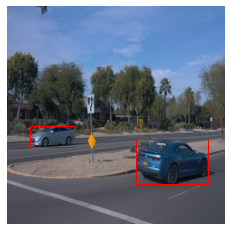

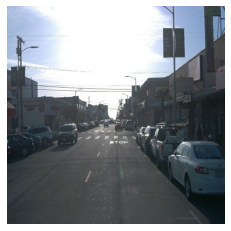

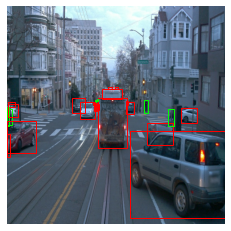

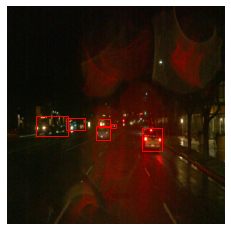

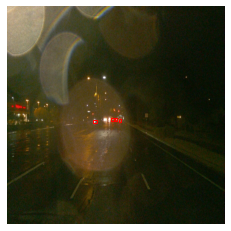

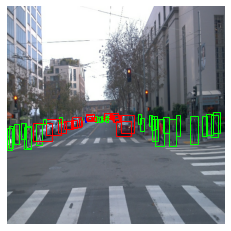

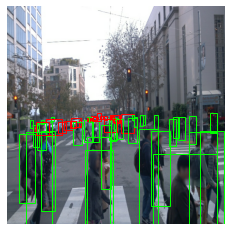

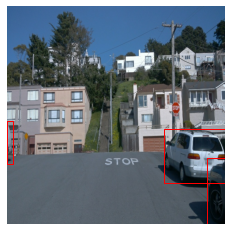

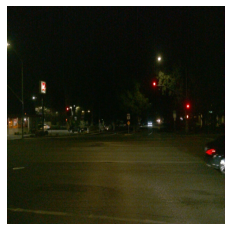

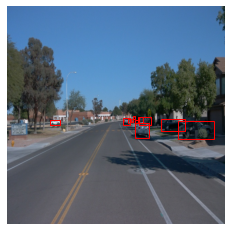

In [14]:
for batch in dataset.shuffle(1000).take(10):
    display_instances(batch)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

Two interesting EDA could be number of classes in the whole dataset and also distriburion of classes in the dataset.

In [ ]:
# first I will look at the number of each class in the dataset
# I tried first with for batch in dataset but it took sooo long.
# So, I will try with the dataset.take(90000) instead.
# I have ran this cell earlier and know that there are only three classes,
# therefore, I make the classes_dist dictionary for them

classes = {}
classes_dist = {1:[], 2:[], 4:[]}
for batch in dataset.take(90000):
    class_count = {1:0, 2:0, 4:0} # this dictionary counts number of classes in each batch
    for cl in batch['groundtruth_classes'].numpy():
        if cl not in classes:
            classes[cl] = 0
        classes[cl] += 1
        class_count[cl] += 1
    for key in classes_dist.keys():
        classes_dist[key].append(class_count[key])

In [ ]:
fig = plt.figure()
plt.bar(classes.keys(), classes.values())
plt.xticks(classes.keys(), ['Autos', 'Pedesterians', 'Bicycles'])
plt.xlabel('ID')
plt.ylabel('Count')
plt.title('Number of each classes')
plt.show()

There are only three classes, 1 for autos, 2 for pedesterians, and 4 for the bicycles.

In [ ]:
n, bins, patches = plt.hist(classes_dis[1], 50, density=True, facecolor='r', alpha=0.75)
plt.xlabel('Number of cars')
plt.ylabel('Number of images')
plt.title('Histogram of cars in images')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.show()

In [ ]:
n, bins, patches = plt.hist(classes_dis[2], 50, density=True, facecolor='b', alpha=0.75)
plt.xlabel('Number of pedesterians')
plt.ylabel('Number of images')
plt.title('Histogram of pedesterians in images')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.show()

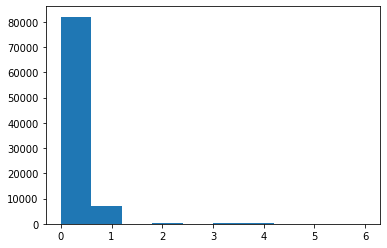

In [34]:
n, bins, patches = plt.hist(classes_dis[4], 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Number of bicycles')
plt.ylabel('Number of images')
plt.title('Histogram of bicycles in images')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.show()